In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/MaternalHealthRiskDataset.csv')

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
#แปลงค่าหมวดหมู่ของ RiskLevel เป็นตัวเลข
le = LabelEncoder()
df["RiskLevel_encoded"] = le.fit_transform(df["RiskLevel"])

In [ ]:
#แยกตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = df[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]
y = df["RiskLevel_encoded"]

In [ ]:
#แบ่งข้อมูลเป็นชุดฝึก (train) และทดสอบ (test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

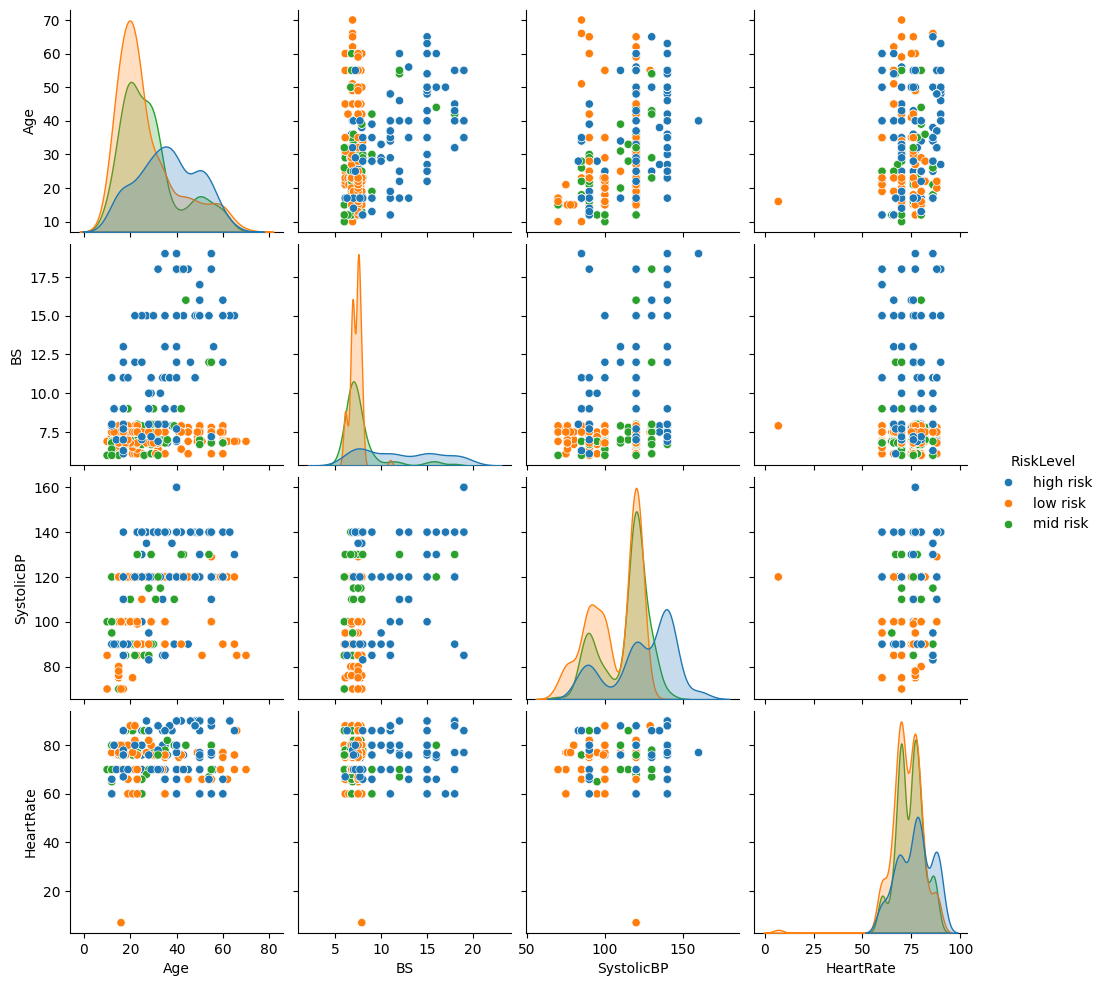

In [ ]:
cols = ["Age", "BS", "SystolicBP", "HeartRate", "RiskLevel"]
sns.pairplot(df[cols], hue="RiskLevel", diag_kind="kde")
plt.show()


# check missing values

In [ ]:
print("===== Missing Values =====")
print(df.isnull().sum())

===== Missing Values =====
Age                  0
SystolicBP           0
DiastolicBP          0
BS                   0
BodyTemp             0
HeartRate            0
RiskLevel            0
RiskLevel_encoded    0
dtype: int64


# Imbalance

In [ ]:
print("\n===== Imbalance Check (RiskLevel Count) =====")
percentage = df['RiskLevel'].value_counts(normalize=True) * 100
print(percentage)


===== Imbalance Check (RiskLevel Count) =====
RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64


In [ ]:
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before Oversample:", y_train.value_counts().to_dict())
print("After Oversample :", y_train_over.value_counts().to_dict())

Before Oversample: {1: 326, 2: 260, 0: 225}
After Oversample : {2: 326, 0: 326, 1: 326}


# RandomForest

In [ ]:
#Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
#ทำนายผลจากชุดทดสอบ
y_pred = rf.predict(X_test)

In [ ]:
#Feature importance values
importances = rf.feature_importances_
features = X.columns

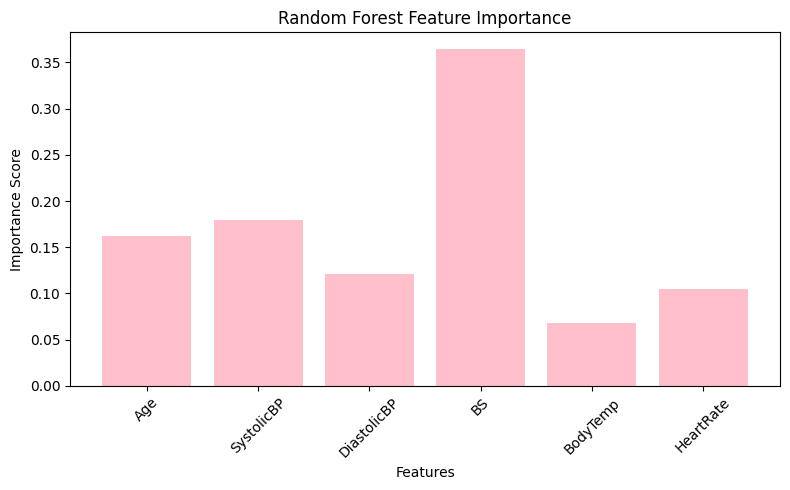


Importance values:
Age: 0.1621
SystolicBP: 0.1794
DiastolicBP: 0.1207
BS: 0.3643
BodyTemp: 0.0683
HeartRate: 0.1052


In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(features, importances, color='pink')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nImportance values:")
for feature, score in zip(features, importances):
    print(f"{feature}: {score:.4f}")

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 82.27%

Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.88      0.76      0.82        80
    mid risk       0.75      0.87      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203



In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
print("\n===== Random Forest Performance =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


===== Random Forest Performance =====
Confusion Matrix:
 [[40  1  6]
 [ 3 61 16]
 [ 3  7 66]]


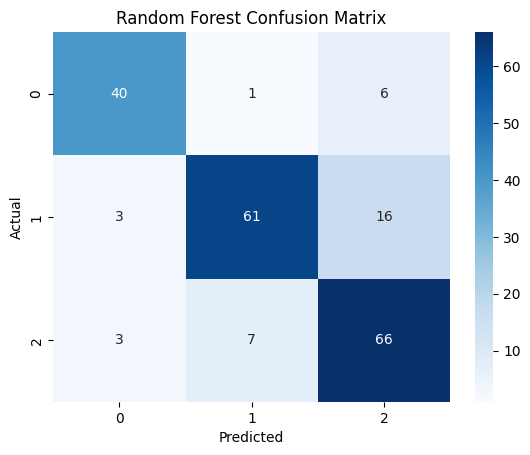

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# XGBoost Model

In [ ]:
#Train XGBoost Model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=3, ...)

In [ ]:
importances = xgb.feature_importances_

print("\n===== XGBoost Feature Importance =====")
for feature, score in zip(X.columns, importances):
    print(f"{feature}: {score:.4f}")


===== XGBoost Feature Importance =====
Age: 0.1063
SystolicBP: 0.2480
DiastolicBP: 0.1166
BS: 0.2517
BodyTemp: 0.1759
HeartRate: 0.1016


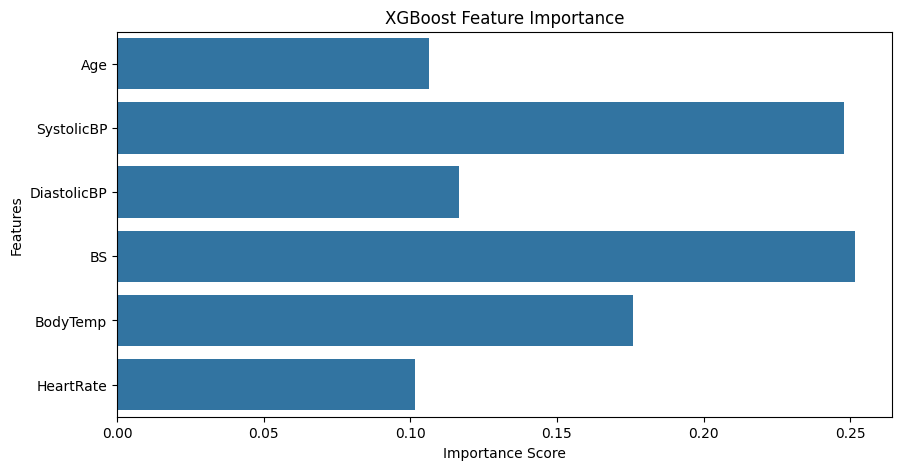

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=X.columns)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
#Performance Metrics
print("===== XGBoost Performance =====")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

===== XGBoost Performance =====
Accuracy: 81.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.81      0.81      0.81        80
           2       0.79      0.80      0.80        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[40  3  4]
 [ 3 65 12]
 [ 3 12 61]]


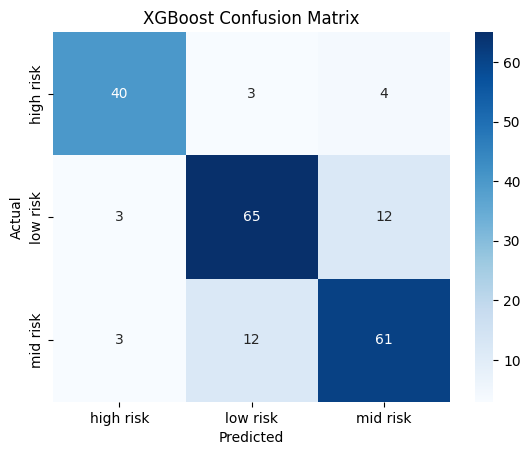

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()